## Evaluating Factor Turnover

In [1]:
import warnings

In [2]:
import alphalens
import pandas as pd
from alphalens.performance import factor_rank_autocorrelation, quantile_turnover
from alphalens.plotting import plot_factor_rank_auto_correlation
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [13]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Calculate and display quantile turnover

In [14]:
turnover = quantile_turnover(alphalens_data, quantile=1)
display(turnover)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000000
2016-01-06 00:00:00+00:00    0.000000
2016-01-07 00:00:00+00:00    0.000000
2016-01-08 00:00:00+00:00    0.000000
                               ...   
2017-09-25 00:00:00+00:00    0.030303
2017-09-26 00:00:00+00:00    0.000000
2017-09-27 00:00:00+00:00    0.000000
2017-09-28 00:00:00+00:00    0.000000
2017-09-29 00:00:00+00:00    0.000000
Freq: C, Name: 1, Length: 440, dtype: float64

Plot the mean quantile turnover per month

<Axes: xlabel='date'>

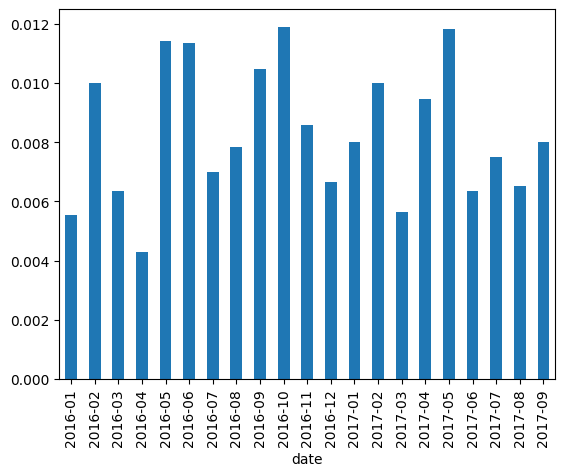

In [15]:
turnover.resample("M").mean().to_period("M").plot.bar()

Calculate and display factor rank autocorrelation

In [16]:
factor_ac = factor_rank_autocorrelation(alphalens_data)
display(factor_ac)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    1.000000
2016-01-06 00:00:00+00:00    1.000000
2016-01-07 00:00:00+00:00    1.000000
2016-01-08 00:00:00+00:00    1.000000
                               ...   
2017-09-25 00:00:00+00:00    0.787847
2017-09-26 00:00:00+00:00    1.000000
2017-09-27 00:00:00+00:00    1.000000
2017-09-28 00:00:00+00:00    1.000000
2017-09-29 00:00:00+00:00    1.000000
Freq: C, Name: 1, Length: 440, dtype: float64

Plot the factor rank autocorrelation

<Axes: title={'center': '1D Period Factor Rank Autocorrelation'}, ylabel='Autocorrelation Coefficient'>

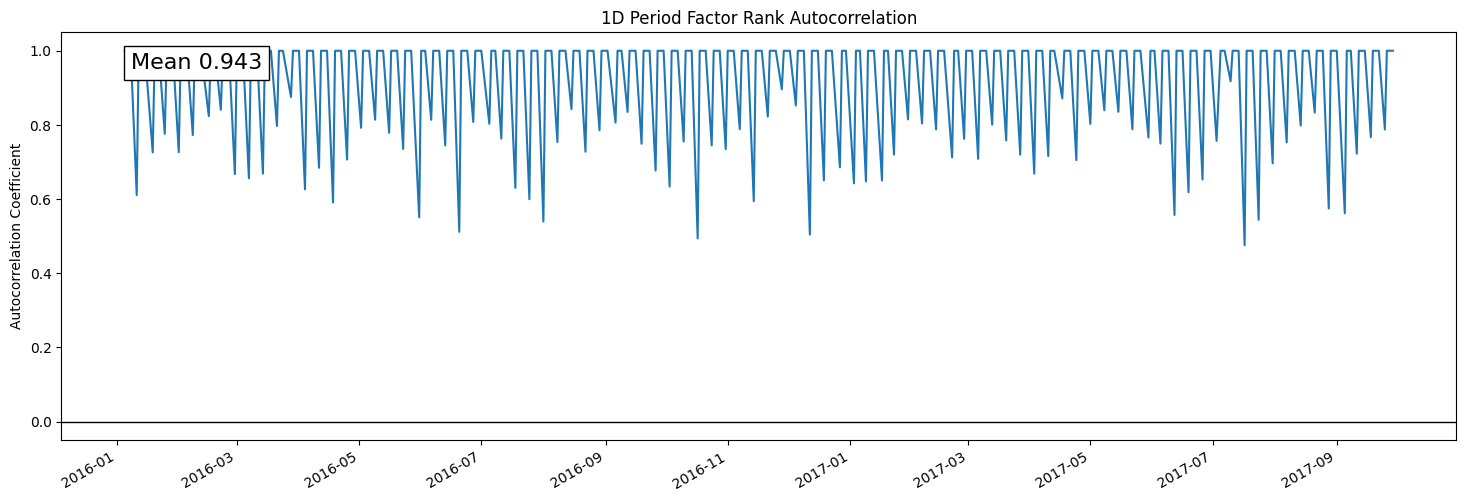

In [17]:
plot_factor_rank_auto_correlation(factor_ac)

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.